In [47]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest

from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('Eldo_case.xlsx')
del df['Login']

# EDA

In [43]:
print("=== Data Overview ===")
print("Shape of DataFrame:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)


=== Data Overview ===
Shape of DataFrame: (2404, 29)

Columns: ['No заказа', 'Дата поступления заказа', 'Название товара в Kaspi Магазине', 'Название в системе продавца', 'Артикул', 'Сумма', 'Категория', 'Адрес самовывоза/доставки', 'Дата изменения статуса', 'Статус', 'Причина отмены', 'Способ оплаты', 'Способ доставки', 'Курьерская служба', 'Принял', 'Выдал', 'Отменил', 'Оценка покупателя', 'Отзыв покупателя', 'Дата публикации отзыва', 'Оформил', 'Количество', 'Стоимость доставки для покупателя', 'Стоимость доставки для продавца', 'Компенсация за доставку', 'Требуется подписание', 'Unnamed: 27', 'Unnamed: 28', 'Processing Time (Days)']

Data Types:
 No заказа                                     int64
Дата поступления заказа              datetime64[ns]
Название товара в Kaspi Магазине             object
Название в системе продавца                  object
Артикул                                      object
Сумма                                         int64
Категория                    

In [20]:
print("\n=== Missing Values ===")
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df) * 100).round(2)
missing_df = pd.DataFrame({'Missing Count': missing_values, 'Missing %': missing_percentage})
print(missing_df)


=== Missing Values ===
                                   Missing Count  Missing %
No заказа                                      0       0.00
Дата поступления заказа                        0       0.00
Название товара в Kaspi Магазине               0       0.00
Название в системе продавца                    2       0.08
Артикул                                        2       0.08
Сумма                                          0       0.00
Категория                                      0       0.00
Адрес самовывоза/доставки                      0       0.00
Дата изменения статуса                         0       0.00
Статус                                         0       0.00
Причина отмены                              1318      54.83
Способ оплаты                                  0       0.00
Способ доставки                                0       0.00
Курьерская служба                            957      39.81
Принял                                       483      20.09
Выдал           

In [21]:
print("\n=== Descriptive Statistics ===")
print("\nNumerical Columns:\n", df.describe())
print("\nCategorical Columns:\n", df.describe(include='object'))


=== Descriptive Statistics ===

Numerical Columns:
           No заказа         Сумма  ...  Компенсация за доставку  \
count  2.404000e+03  2.404000e+03  ...               935.000000   
mean   2.126419e+08  1.394379e+05  ...               105.882353   
std    6.432830e+06  1.685179e+05  ...               307.851655   
min    2.012159e+08  3.000000e+02  ...                 0.000000   
25%    2.066058e+08  2.616650e+04  ...                 0.000000   
50%    2.130949e+08  1.125495e+05  ...                 0.000000   
75%    2.180675e+08  1.801600e+05  ...                 0.000000   
max    2.253120e+08  1.963970e+06  ...              1000.000000   

       Требуется подписание  
count                   0.0  
mean                    NaN  
std                     NaN  
min                     NaN  
25%                     NaN  
50%                     NaN  
75%                     NaN  
max                     NaN  

[8 rows x 8 columns]

Categorical Columns:
        Дата поступления зака

In [22]:
print("\n=== Unique Values in Categorical Columns ===")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:\n", df[col].value_counts(dropna=False))


=== Unique Values in Categorical Columns ===

Дата поступления заказа:
 Дата поступления заказа
17.07.2022    51
15.07.2022    40
20.09.2022    37
19.08.2022    36
28.05.2022    34
              ..
23.05.2022     2
06.11.2022     1
25.07.2022     1
31.07.2022     1
07.11.2022     1
Name: count, Length: 159, dtype: int64

Название товара в Kaspi Магазине:
 Название товара в Kaspi Магазине
ART.FiT FB75 75 см фиолетовый                            101
Red Line Ibox Crystal для Samsung A01 Core прозрачный    100
Artel HD 345RN Steel серый                                79
Gree Bora GWH12AAB-K3NNA1A + монтажный комплект           60
Artel HD 345 RN серебристый                               57
                                                        ... 
DAUSCHER DCH-8000BL черный                                 1
Утюг AVA SL-2033 черный                                    1
OTEX OWM-12RP белый + монтажный комплект                   1
Пылесос Artel VCC 0220 черный                              


=== Numerical Columns Distribution ===

No заказа Summary:
 count    2.404000e+03
mean     2.126419e+08
std      6.432830e+06
min      2.012159e+08
25%      2.066058e+08
50%      2.130949e+08
75%      2.180675e+08
max      2.253120e+08
Name: No заказа, dtype: float64


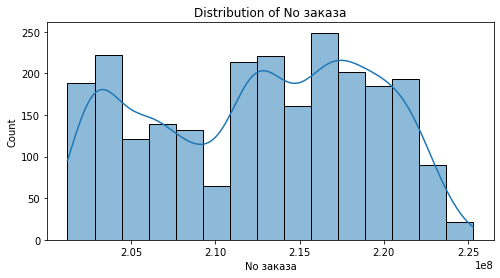


Сумма Summary:
 count    2.404000e+03
mean     1.394379e+05
std      1.685179e+05
min      3.000000e+02
25%      2.616650e+04
50%      1.125495e+05
75%      1.801600e+05
max      1.963970e+06
Name: Сумма, dtype: float64


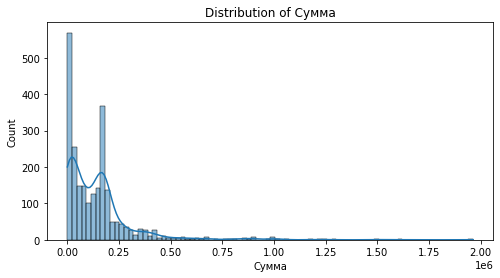


Оформил Summary:
 count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Оформил, dtype: float64


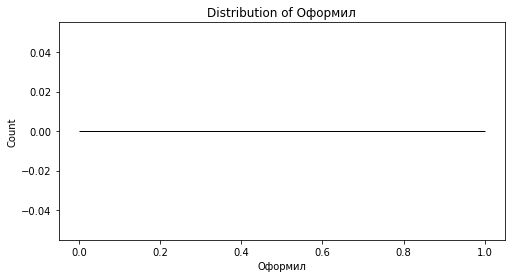


Количество Summary:
 count    2404.000000
mean        1.056988
std         0.413662
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        10.000000
Name: Количество, dtype: float64


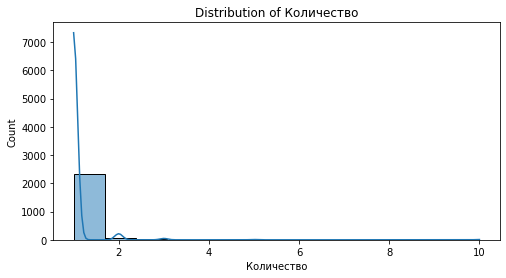


Стоимость доставки для покупателя Summary:
 count    2404.000000
mean       50.748752
std       219.529869
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1000.000000
Name: Стоимость доставки для покупателя, dtype: float64


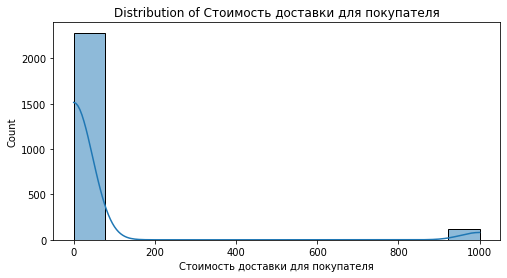


Стоимость доставки для продавца Summary:
 count     2192.000000
mean       280.577555
std       1107.229515
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      11757.000000
Name: Стоимость доставки для продавца, dtype: float64


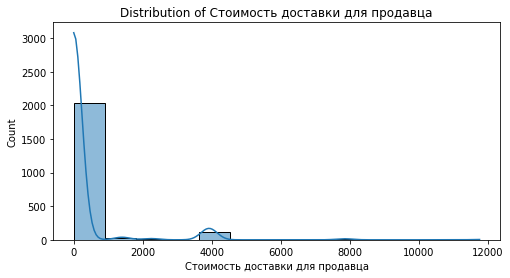


Компенсация за доставку Summary:
 count     935.000000
mean      105.882353
std       307.851655
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1000.000000
Name: Компенсация за доставку, dtype: float64


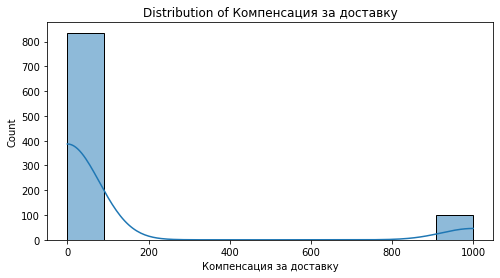


Требуется подписание Summary:
 count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Требуется подписание, dtype: float64


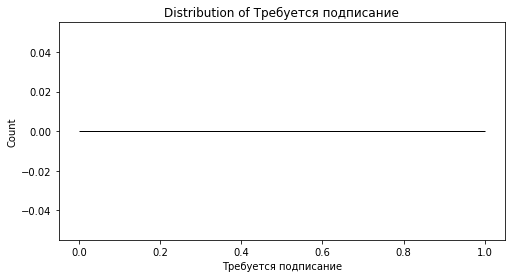

In [27]:
print("\n=== Numerical Columns Distribution ===")
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    print(f"\n{col} Summary:\n", df[col].describe())
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


=== Categorical Columns Analysis ===


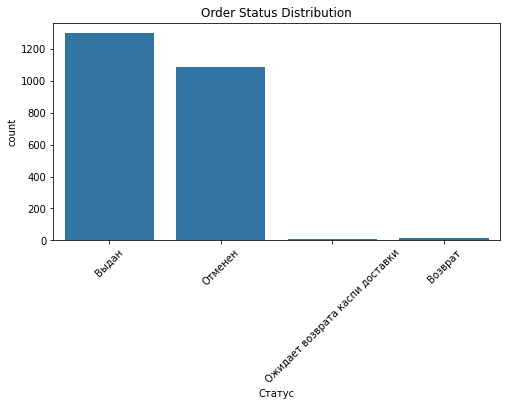

In [28]:
print("\n=== Categorical Columns Analysis ===")
# Status distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Статус')
plt.title('Order Status Distribution')
plt.xticks(rotation=45)
plt.show()


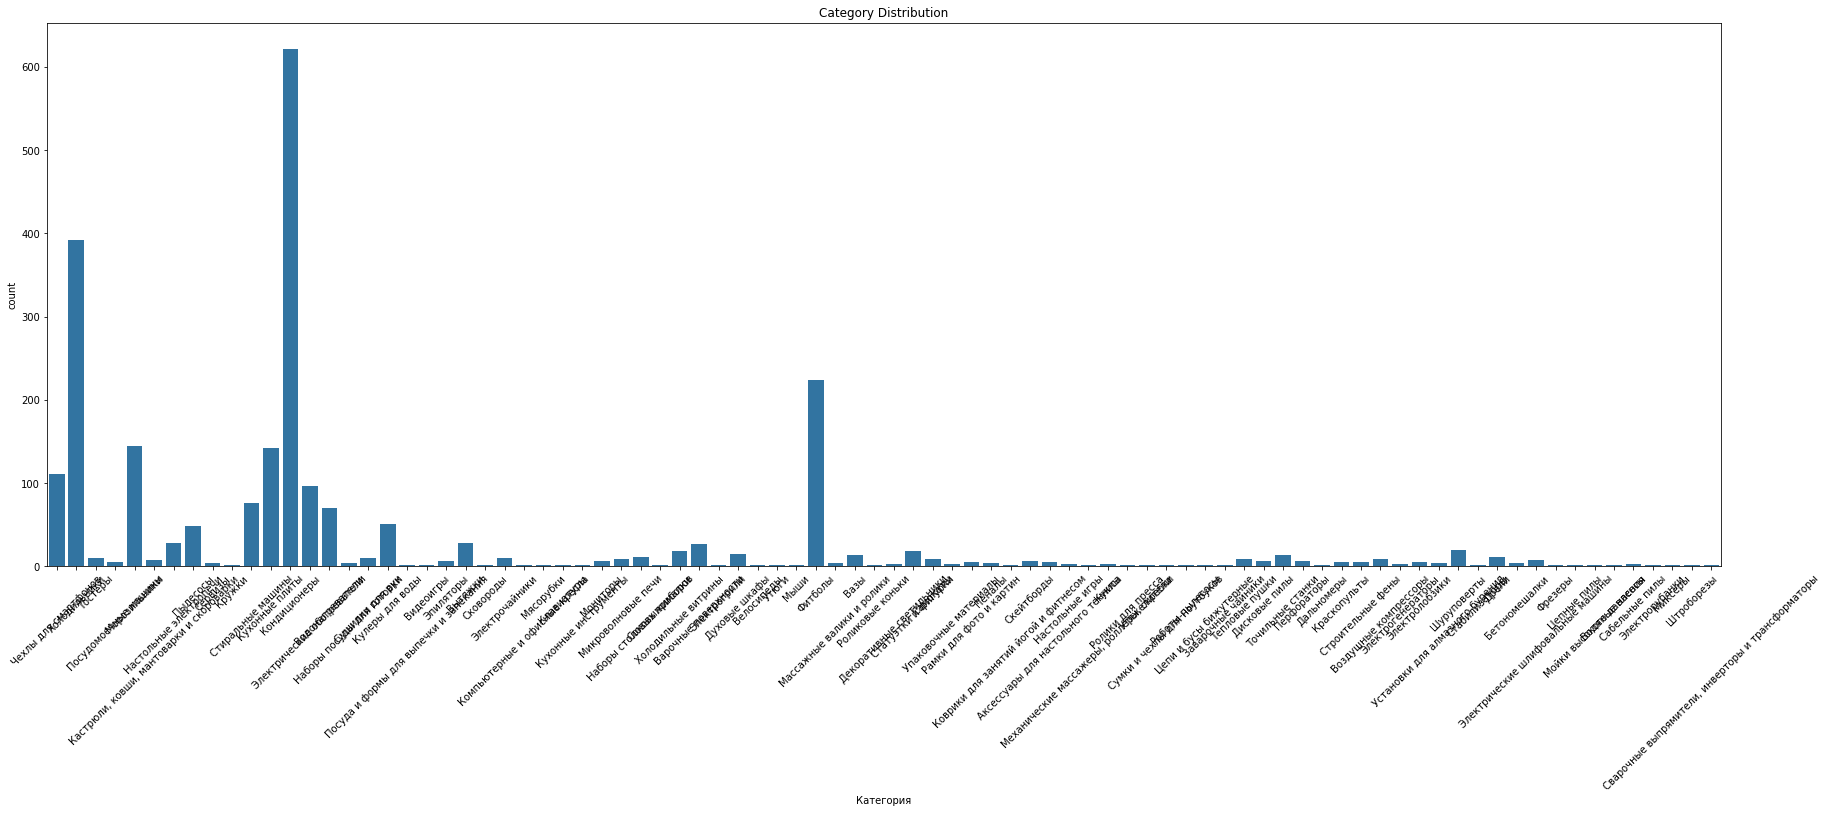

In [34]:
plt.figure(figsize=(30,10))
sns.countplot(data=df, x='Категория')
plt.title('Category Distribution')
plt.xticks(rotation=45)
plt.show()


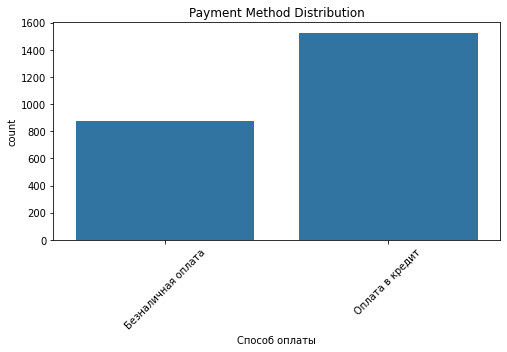

In [35]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Способ оплаты')
plt.title('Payment Method Distribution')
plt.xticks(rotation=45)
plt.show()

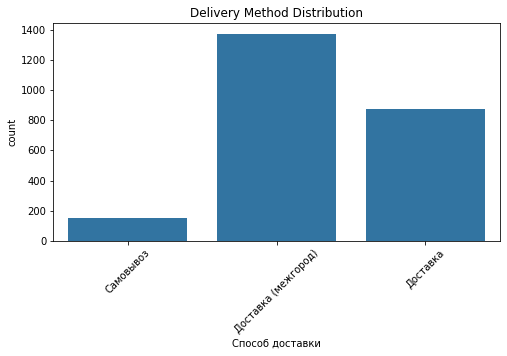

In [36]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Способ доставки')
plt.title('Delivery Method Distribution')
plt.xticks(rotation=45)
plt.show()


=== Correlation Matrix ===


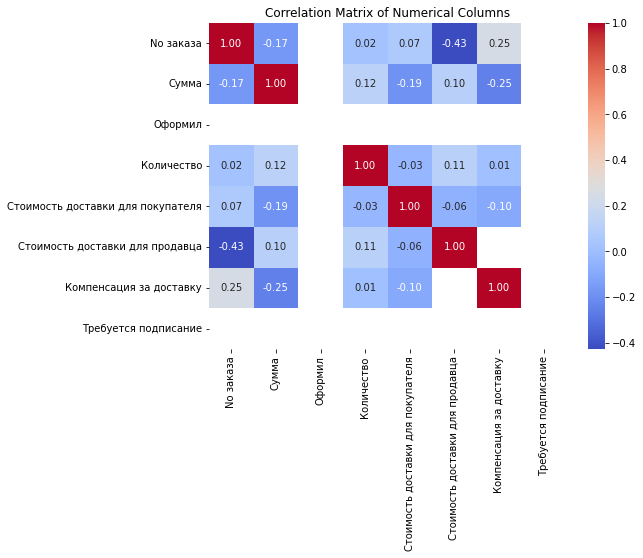

In [37]:
print("\n=== Correlation Matrix ===")
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Columns')
plt.show()


=== Order Amount by Category ===
                                         mean      sum  count
Категория                                                    
Аксессуары для настольного тенниса   19000.00    95000      5
Бетономешалки                       124598.75   498395      4
Вазы                                  4085.71    57200     14
Варочные поверхности                143931.41  3886148     27
Велосипеды                          125988.00   125988      1
...                                       ...      ...    ...
Электрогрили                        678088.00   678088      1
Электролобзики                       17330.00    86650      5
Электрорубанки                       24090.00    24090      1
Электрочайники                       14468.00   144680     10
Эпиляторы                             9878.00    59268      6

[86 rows x 3 columns]


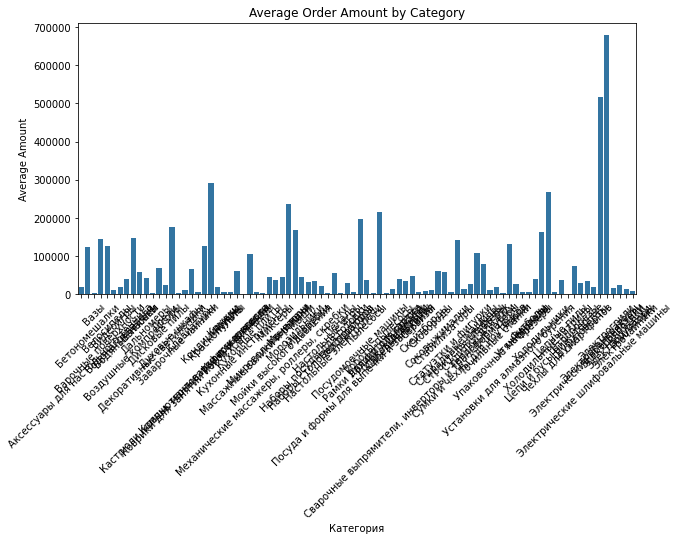

In [38]:
print("\n=== Order Amount by Category ===")
category_amount = df.groupby('Категория')['Сумма'].agg(['mean', 'sum', 'count']).round(2)
print(category_amount)
plt.figure(figsize=(10, 5))
sns.barplot(x='Категория', y='mean', data=category_amount.reset_index())
plt.title('Average Order Amount by Category')
plt.xticks(rotation=45)
plt.ylabel('Average Amount')
plt.show()


=== Order Status vs Amount ===
                                      mean        sum  count
Статус                                                      
Возврат                           83416.69    1084417     13
Выдан                            123026.76  159934791   1300
Ожидает возврата каспи доставки  102647.00     513235      5
Отменен                          159922.80  173676156   1086


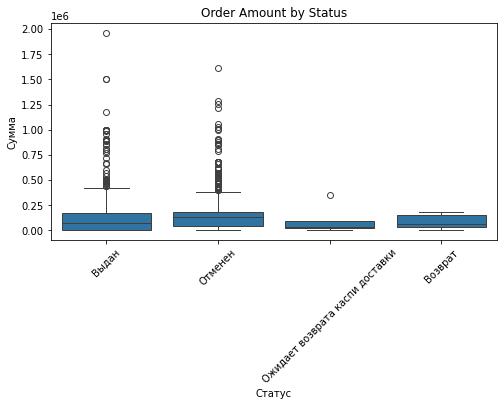

In [39]:
print("\n=== Order Status vs Amount ===")
status_amount = df.groupby('Статус')['Сумма'].agg(['mean', 'sum', 'count']).round(2)
print(status_amount)
plt.figure(figsize=(8, 4))
sns.boxplot(x='Статус', y='Сумма', data=df)
plt.title('Order Amount by Status')
plt.xticks(rotation=45)
plt.show()


In [40]:
print("\n=== Date Analysis ===")
df['Дата поступления заказа'] = pd.to_datetime(df['Дата поступления заказа'], format='%d.%m.%Y')
df['Дата изменения статуса'] = pd.to_datetime(df['Дата изменения статуса'], format='%d.%m.%Y')
df['Processing Time (Days)'] = (df['Дата изменения статуса'] - df['Дата поступления заказа']).dt.days
print("\nProcessing Time (Days):\n", df['Processing Time (Days)'].describe())


=== Date Analysis ===

Processing Time (Days):
 count    2404.000000
mean        2.753328
std         3.482476
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        52.000000
Name: Processing Time (Days), dtype: float64


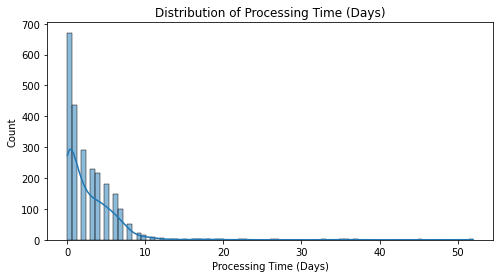

In [41]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Processing Time (Days)'], kde=True)
plt.title('Distribution of Processing Time (Days)')
plt.show()

In [42]:
print("\n=== Review Analysis ===")
print(df['Оценка покупателя'].value_counts(dropna=False))
print("\nReviews:\n", df['Отзыв покупателя'].value_counts(dropna=False))


=== Review Analysis ===
Оценка покупателя
Без оценки    2338
5               58
1                3
4                2
2                1
3                1
5                1
Name: count, dtype: int64

Reviews:
 Отзыв покупателя
Без отзыва                                                                                                                                                                                                                                                                          2338
👍👍👍                                                                                                                                                                                                                                                                                    3
Обслуживание отличное.                                                                                                                                                                                          

# Anomaly detection

In [44]:
df['Дата поступления заказа'] = pd.to_datetime(df['Дата поступления заказа'], format='%d.%m.%Y')
df['Дата изменения статуса'] = pd.to_datetime(df['Дата изменения статуса'], format='%d.%m.%Y')
df['Processing Time (Days)'] = (df['Дата изменения статуса'] - df['Дата поступления заказа']).dt.days


In [45]:
numerical_cols = ['Сумма', 'Количество', 'Стоимость доставки для покупателя', 
                  'Стоимость доставки для продавца', 'Компенсация за доставку', 'Processing Time (Days)']
numerical_data = df[numerical_cols].copy()

numerical_data['Компенсация за доставку'] = numerical_data['Компенсация за доставку'].fillna(0)

In [50]:
# 2. Isolation Forest for Numerical Anomalies
print("=== Numerical Anomaly Detection (Isolation Forest) ===")
iso_forest = IsolationForest(contamination=0.2, random_state=42)  # 20% contamination for small dataset
numerical_data['Anomaly'] = iso_forest.fit_predict(numerical_data.fillna(0))

=== Numerical Anomaly Detection (Isolation Forest) ===


In [51]:
# Mark anomalies (-1 for anomalies, 1 for normal)
df['Numerical Anomaly'] = numerical_data['Anomaly'].map({1: 'Normal', -1: 'Anomaly'})
anomalies_numerical = df[df['Numerical Anomaly'] == 'Anomaly']
print("\nNumerical Anomalies:\n", anomalies_numerical[['No заказа', 'Сумма', 'Категория', 'Numerical Anomaly']])



Numerical Anomalies:
       No заказа   Сумма                 Категория Numerical Anomaly
23    212678456  426116              Кондиционеры           Anomaly
24    212187122  415596              Морозильники           Anomaly
32    211999161    2000           Водонагреватели           Anomaly
47    214243215  425976              Кондиционеры           Anomaly
49    214210083   69996           Кулеры для воды           Anomaly
...         ...     ...                       ...               ...
2278  217044923   30376  Наборы столовых приборов           Anomaly
2313  222096634  350506              Кондиционеры           Anomaly
2376  216619764  179990              Холодильники           Anomaly
2383  221939602   51028               Шуруповерты           Anomaly
2394  222187315   97414           Сушилки для рук           Anomaly

[480 rows x 4 columns]


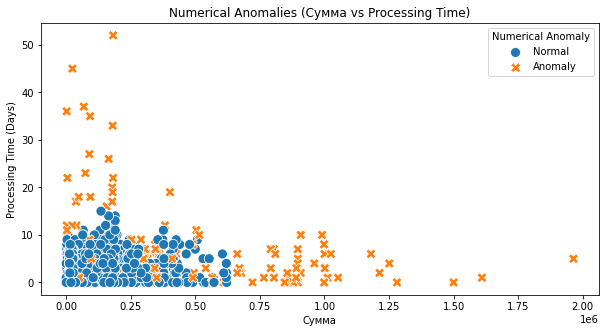

In [64]:
# Visualize numerical anomalies
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Сумма', y='Processing Time (Days)', hue='Numerical Anomaly', style='Numerical Anomaly', data=df, s=100)
plt.title('Numerical Anomalies (Сумма vs Processing Time)')
plt.show()

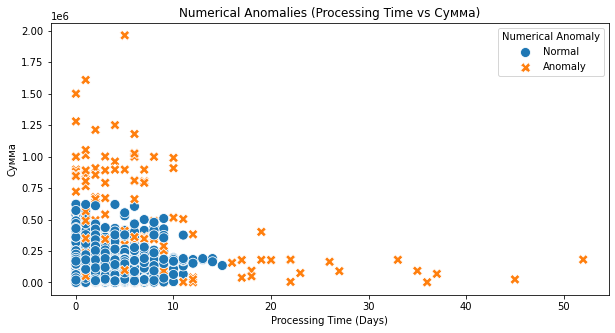

In [68]:
# Visualize numerical anomalies
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Processing Time (Days)', y='Сумма', hue='Numerical Anomaly', style='Numerical Anomaly', data=df, s=100)
plt.title('Numerical Anomalies (Processing Time vs Сумма)')
plt.show()

In [57]:
# Orders with high amount but cancelled
high_amount_threshold = df['Сумма'].quantile(0.75)  # Top 25% amounts
cancelled_high_amount = df[(df['Статус'] == 'Отменен') & (df['Сумма'] > high_amount_threshold)]
if not cancelled_high_amount.empty:
    print("\nAnomaly: Cancelled orders with high amount:\n", cancelled_high_amount[['No заказа', 'Сумма', 'Статус']])
    anomalies_categorical.append(cancelled_high_amount)
    


Anomaly: Cancelled orders with high amount:
       No заказа   Сумма   Статус
3     211451472  199999  Отменен
5     211476962  209989  Отменен
18    211732411  189680  Отменен
23    212678456  426116  Отменен
37    213650265  529998  Отменен
...         ...     ...      ...
2362  217004991  264872  Отменен
2363  217592400  224845  Отменен
2389  222408864  186349  Отменен
2397  223345395  199990  Отменен
2400  223659721  184710  Отменен

[308 rows x 3 columns]
